In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from LocalRegression.ml_models import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
random.seed(0)
np.random.seed(0)

In [3]:
boston = load_boston()

In [4]:
X = boston.data
y = boston.target.reshape(-1,1)

std_scaler = StandardScaler()
std_scaler_y = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
y_scaled = std_scaler_y.fit_transform(y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [ ]:
for degree in [1, 2, 3]:
    for pca_comp in [None, 1, 2, 3, 4]:
        model = BMLR(cut=15, M=10, substitution_policy='nearest', degree=degree, max_pca_components=pca_comp)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        score = mean_squared_error(y_test, pred, squared=False)
        mape = mean_absolute_percentage_error(y_test, pred)
        print(f'degee={degree} pca_comp={pca_comp} mape={mape} score={score}')

degee=1 pca_comp=None mape=1.9143571454233996 score=0.5125748364324093
degee=1 pca_comp=1 mape=2.0026914007113708 score=0.5328526689209976
degee=1 pca_comp=2 mape=1.7341688196138114 score=0.5110197517899039
degee=1 pca_comp=3 mape=2.140581545828273 score=0.5581775682255381
degee=1 pca_comp=4 mape=1.9160170082099999 score=0.5311170094886865
degee=2 pca_comp=None mape=2.033883817500112 score=0.5371680462739871
degee=2 pca_comp=1 mape=1.6859531606102522 score=0.5451636451860333
degee=2 pca_comp=2 mape=1.8574933823953619 score=0.5358608486635712
degee=2 pca_comp=3 mape=2.1956664548671565 score=0.5446413903788313
degee=2 pca_comp=4 mape=2.24291076105673 score=0.5324284176713652
degee=3 pca_comp=None mape=1.9044973572086674 score=0.5545785734909061
degee=3 pca_comp=1 mape=2.0200749284194166 score=0.5890418936934955


In [ ]:
def get_optimal_bmlr(degree):
    bmlrs = {}
    for cut in [0, 10, 20, 30, 50]:
        bmlr_params = model_bmlr_params(X_train, y_train, cut=cut, M=20, degree=degree)
        score, mape, pred, model = model_bmlr(X_train, y_train, X_test, y_test, cut=cut, M=20, degree=degree, params=bmlr_params)
        bmlrs[cut] = [score, mape, pred, model]
        print(score)
    scores = [x[0] for x in bmlrs.values()]
    opt_bmlr_id = np.argmin(scores)
    opt_bmlr_cut = list(bmlrs.keys())[opt_bmlr_id]
    opt_score_bmlr =  bmlrs[opt_bmlr_cut][0]
    opt_pred_bmlr =  bmlrs[opt_bmlr_cut][2]
    opt_model_bmlr = bmlrs[opt_bmlr_cut][3]
    return opt_score_bmlr, opt_pred_bmlr, opt_model_bmlr

In [ ]:
bmlr_params = model_bmlr_params(X_train, y_train, cut=cut, M=20, degree=degree, pc)

In [14]:
opt_score_bmlr, opt_pred_bmlr, opt_model_bmlr = get_optimal_bmlr(degree=1)

In [7]:
mars_params = model_mars_params(X_train, y_train)
opt_score_mars, opt_mape_mars, opt_pred_mars, opt_model_mars = model_mars(X_train, y_train, X_test, y_test, params = mars_params)

In [8]:
svr_params = model_svr_params(X_train, y_train)
opt_score_svr, opt_mape_svr, opt_pred_svr, opt_model_svr = model_svr(X_train, y_train, X_test, y_test, params = svr_params)

In [9]:
rf_params = model_random_forest_params(X_train, y_train)
opt_score_rf, opt_mape_rf, opt_pred_rf, opt_model_rf = model_random_forest(X_train, y_train, X_test, y_test, params = rf_params)

In [10]:
# train CatBoost model
opt_score_cb, opt_mape_cb, opt_pred_cb, opt_model_cb = model_catboost(X_train, y_train, X_test, y_test)

In [15]:
print(f'RMSE(BMLR)/RMSE(MARS): {opt_score_bmlr/opt_score_mars}')
print(f'RMSE(BMLR)/RMSE(SV): {opt_score_bmlr/opt_score_svr}')
print(f'RMSE(BMLR)/RMSE(RF): {opt_score_bmlr/opt_score_rf}')
print(f'RMSE(BMLR)/RMSE(CB): {opt_score_bmlr/opt_score_cb}')

RMSE(BMLR)/RMSE(MARS): 1.0600047659796858
RMSE(BMLR)/RMSE(SV): 1.2638271716680312
RMSE(BMLR)/RMSE(RF): 1.3173046756245477
RMSE(BMLR)/RMSE(CB): 1.1646922613259034


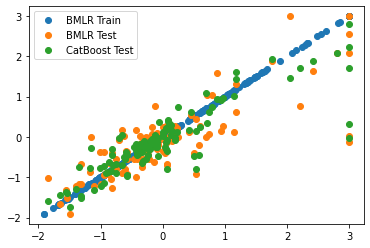

In [16]:
plt.plot(y_train, opt_model_bmlr.predict(X_train), 'o', label='BMLR Train')
plt.plot(y_test, opt_model_bmlr.predict(X_test), 'o', label='BMLR Test')
plt.plot(y_test, opt_pred_cb, 'o', label='CatBoost Test')
plt.legend()

In [18]:
import joblib
joblib.dump(opt_model_rf, 'boston_rf.joblib')
joblib.dump(opt_model_mars, 'boston_mars.joblib')
joblib.dump(opt_model_svr, 'boston_svr.joblib')
joblib.dump(opt_model_cb, 'boston_cb.joblib')
joblib.dump(opt_model_bmlr, 'boston_mbrf.joblib')

['boston_mbrf.joblib']